<a href="https://colab.research.google.com/github/MNazamy/data_analytics/blob/main/Python/Unit3_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1 & 2: Imports & Data Collection

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv', sep=',',index_col=0)

df = df.copy() #begin work on a copy

df.head()

,county,state,fips,cases,deaths
date,,,,,
2020-01-21,Snohomish,Washington,53061.0,1,0.0
2020-01-22,Snohomish,Washington,53061.0,1,0.0
2020-01-23,Snohomish,Washington,53061.0,1,0.0
2020-01-24,Cook,Illinois,17031.0,1,0.0
2020-01-24,Snohomish,Washington,53061.0,1,0.0


##Task 3:  Data Wrangling and EDA

In [103]:
df[(df.deaths.isna())] #i realized that we have alot of null deathcounts from puerto rico
                        #i love my puerto ricans, but this data is no bueno

,county,state,fips,cases,deaths
date,,,,,
2020-05-05,Adjuntas,Puerto Rico,72001.0,3,NaN
2020-05-05,Aguada,Puerto Rico,72003.0,7,NaN
2020-05-05,Aguadilla,Puerto Rico,72005.0,11,NaN
2020-05-05,Aguas Buenas,Puerto Rico,72007.0,22,NaN
2020-05-05,Aibonito,Puerto Rico,72009.0,13,NaN
...,...,...,...,...,...
2021-01-17,Vega Baja,Puerto Rico,72145.0,2460,NaN
2021-01-17,Vieques,Puerto Rico,72147.0,193,NaN
2021-01-17,Villalba,Puerto Rico,72149.0,657,NaN


In [104]:
df=df[df['state']!='Puerto Rico']
df.isnull().sum()    #dropped puerto rico from this dataset.

county       0
state        0
fips      8461
cases        0
deaths       0
dtype: int64

In [105]:
del df['fips']
df

,county,state,cases,deaths
date,,,,
2020-01-21,Snohomish,Washington,1,0.0
2020-01-22,Snohomish,Washington,1,0.0
2020-01-23,Snohomish,Washington,1,0.0
2020-01-24,Cook,Illinois,1,0.0
2020-01-24,Snohomish,Washington,1,0.0
...,...,...,...,...
2021-01-17,Sweetwater,Wyoming,3290,26.0
2021-01-17,Teton,Wyoming,2685,4.0
2021-01-17,Uinta,Wyoming,1817,9.0


## Task 3.5 NYC Covid Data

### Data Wrangling

In [106]:
df_nyc = df[(df['state']=='New York') & (df['county']=='New York City')]

In [107]:
df_nyc['new cases']=0.0 #new coloumn to track daily new cases
df_nyc['new deaths']=0.0 #new coloumn to track daily new deaths
df_nyc['days'] = 0 #new coloumn to track days since begin of spread in NYC

for i in range(0,322): #filling in the coloumn with numbers
  df_nyc.iloc[i,6] = i

df_nyc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,county,state,cases,deaths,new cases,new deaths,days
date,,,,,,,
2020-03-01,New York City,New York,1,0.0,0.0,0.0,0
2020-03-02,New York City,New York,1,0.0,0.0,0.0,1
2020-03-03,New York City,New York,2,0.0,0.0,0.0,2
2020-03-04,New York City,New York,2,0.0,0.0,0.0,3
2020-03-05,New York City,New York,4,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...
2021-01-13,New York City,New York,504826,25741.0,0.0,0.0,318
2021-01-14,New York City,New York,510711,25834.0,0.0,0.0,319
2021-01-15,New York City,New York,517963,25909.0,0.0,0.0,320


In [108]:
for i in range(1,322) : 
  """this loop will go through our NYC data to give fill in 2 coloumns. New Deaths and New Cases, which are measured from the day prior"""
  prevDeaths = df_nyc.iloc[i-1, 3] 
  todayDeaths = df_nyc.iloc[i,3]
  df_nyc.iloc[i,5] = todayDeaths - prevDeaths #New deaths = total deaths today - total deaths yesterday

  prevCases = df_nyc.iloc[i-1,2]
  todayCases = df_nyc.iloc[i,2]
  df_nyc.iloc[i,4] = todayCases - prevCases #New cases = total cases by today - total cases by yesterday

df_nyc

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,county,state,cases,deaths,new cases,new deaths,days
date,,,,,,,
2020-03-01,New York City,New York,1,0.0,0.0,0.0,0
2020-03-02,New York City,New York,1,0.0,0.0,0.0,1
2020-03-03,New York City,New York,2,0.0,1.0,0.0,2
2020-03-04,New York City,New York,2,0.0,0.0,0.0,3
2020-03-05,New York City,New York,4,0.0,2.0,0.0,4
...,...,...,...,...,...,...,...
2021-01-13,New York City,New York,504826,25741.0,5949.0,43.0,318
2021-01-14,New York City,New York,510711,25834.0,5885.0,93.0,319
2021-01-15,New York City,New York,517963,25909.0,7252.0,75.0,320


In [109]:
df_nyc.iloc[158,5] = 6.0 #fixing some outliers that seemd to be typos / errors
df_nyc.iloc[121,5] = 6.0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Plots

(0.0, 50.0)

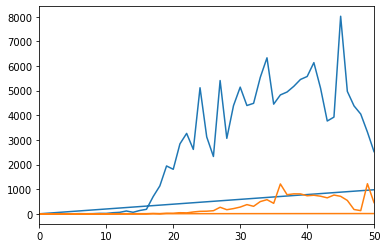

In [110]:
plt.plot(df_nyc['days'],df_nyc['new cases']) #NYC since the beginning
plt.plot(df_nyc['days'],df_nyc['new deaths'])
plt.xlim(0,50)

(0.0, 50.0)

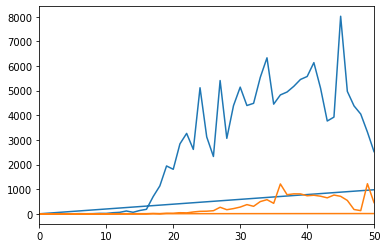

In [111]:
plt.plot(df_nyc['days'],df_nyc['new cases']) #NYC first 50 days 
plt.plot(df_nyc['days'],df_nyc['new deaths'])
plt.xlim(0,50)


(291.0, 321.0)

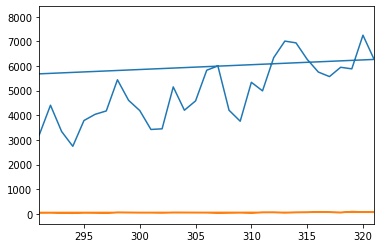

In [112]:
plt.plot(df_nyc['days'],df_nyc['new cases']) #NYC last 30 days
plt.plot(df_nyc['days'],df_nyc['new deaths'])
plt.xlim(291,321)


## Task 4 NYS Covid Data

### Data Wrangling

In [113]:
df_nys = df[ df['state'] == 'New York' ]
df_nys['new cases']=0.0
df_nys['new deaths']=0.0
df_nys['days']=0

df_nys = df_nys.groupby(['date']).sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [114]:
for i in range(1,322) : 
  """this loop will go through our NYC data to give fill in 2 coloumns. New Deaths and New Cases, which are measured from the day prior"""
  prevDeaths = df_nys.iloc[i-1,1] 
  todayDeaths = df_nys.iloc[i,1]
  df_nys.iloc[i,3] = todayDeaths - prevDeaths #New deaths = total deaths today - total deaths yesterday

  prevCases = df_nys.iloc[i-1,0]
  todayCases = df_nys.iloc[i,0]
  df_nys.iloc[i,2] = todayCases - prevCases #New cases = total cases by today - total cases by yesterday

  df_nys.iloc[i,4]=i #this line fills in the 'days' coloumn with # of days since first case in NYS

df_nys

,cases,deaths,new cases,new deaths,days
date,,,,,
2020-03-01,1,0.0,0.0,0.0,0
2020-03-02,1,0.0,0.0,0.0,1
2020-03-03,2,0.0,1.0,0.0,2
2020-03-04,11,0.0,9.0,0.0,3
2020-03-05,22,0.0,11.0,0.0,4
...,...,...,...,...,...
2021-01-13,1179523,39760.0,14704.0,172.0,318
2021-01-14,1193710,39997.0,14187.0,237.0,319
2021-01-15,1213179,40203.0,19469.0,206.0,320


### Plots

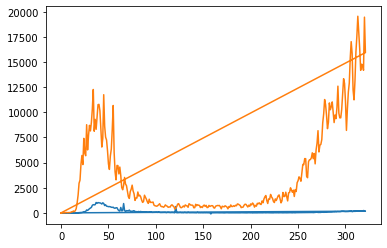

In [115]:
plt.plot(df_nys['days'],df_nys['new deaths'])
plt.plot(df_nys['days'],df_nys['new cases'])

(0.0, 50.0)

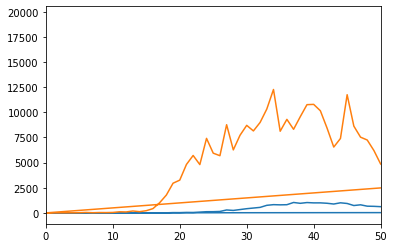

In [116]:
plt.plot(df_nys['days'],df_nys['new deaths']) #first 50 days in NYS
plt.plot(df_nys['days'],df_nys['new cases'])
plt.xlim(0,50)

(290.0, 321.0)

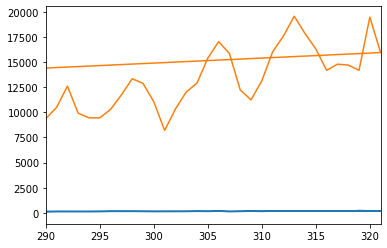

In [117]:
plt.plot(df_nys['days'],df_nys['new deaths']) #first 50 days in NYS
plt.plot(df_nys['days'],df_nys['new cases'])
plt.xlim(290,321)

##Task 5:: Comparing COVID 19 effects in High-Population States vs Low-Population States

### Data Wrangling

In [118]:
""" Making 2 dataframes, one with 8 highest population states (approx 1/2 US population), and the other dataframe with the other 1/2 US pop which is less denseley populated """

df_highpop_states = df[ (df['state'] == 'California') | (df['state'] == 'New York') | (df['state'] == 'Texas') | (df['state'] == 'Florida') | (df['state'] == 'Pennsylvania') | (df['state'] == 'Illinois')| (df['state'] == 'Georgia')| (df['state'] == 'Ohio') ]
df_lowpop_states = df[ (df['state'] != 'California') & (df['state'] != 'New York') & (df['state'] != 'Texas') & (df['state'] != 'Florida') & (df['state'] != 'Pennsylvania') & (df['state'] != 'Illinois')& (df['state'] != 'Georgia')& (df['state'] != 'Ohio')]

df_highpop_states = df_highpop_states.groupby(['date']).sum()
df_lowpop_states = df_lowpop_states.groupby(['date']).sum()

In [119]:
df_highpop_states['new cases'] = 0.0
df_highpop_states['new deaths'] = 0.0
df_highpop_states['days'] = 0
df_lowpop_states['new cases'] = 0.0
df_lowpop_states['new deaths'] = 0.0
df_lowpop_states['days'] = 0

df_lowpop_states = df_lowpop_states.drop(['2020-01-21','2020-01-22','2020-01-23','2020-01-24'])


In [120]:
for i in range(1,359):
  prevdeaths = df_highpop_states.iloc[i-1,1]
  currdeaths = df_highpop_states.iloc[i,1]
  df_highpop_states.iloc[i,3]= currdeaths - prevdeaths #same as we did for NYC and NYS plotting 

  prevcases = df_highpop_states.iloc[i-1,0]
  currcases = df_highpop_states.iloc[i,0]
  df_highpop_states.iloc[i,2]= currcases - prevcases #same as we did for NYC and NYS plotting 

  df_highpop_states.iloc[i,4] = i #for the days

  prevdeaths = df_lowpop_states.iloc[i-1,1]
  currdeaths = df_lowpop_states.iloc[i,1]
  df_lowpop_states.iloc[i,3]= currdeaths - prevdeaths #same as we did for NYC and NYS plotting 

  prevcases = df_lowpop_states.iloc[i-1,0]
  currcases = df_lowpop_states.iloc[i,0]
  df_lowpop_states.iloc[i,2]= currcases - prevcases #same as we did for NYC and NYS plotting 

  df_lowpop_states.iloc[i,4] = i #for the days

In [121]:
df_states = df_lowpop_states.copy()

df_states['Highpop cases'] = 0
df_states['Highpop deaths'] = 0
df_states['Highpop new cases'] = 0
df_states['Highpop new deaths'] = 0

df_states.rename(columns={'cases':'Lowpop cases', 'deaths': 'Lowpop deaths', 'new cases':'Lowpop new cases', 'new deaths':'Lowpop new deaths'}, inplace=True)


In [122]:
for i in range(1,359):
  df_states.iloc[i,5] = df_highpop_states.iloc[i,0] #cases
  df_states.iloc[i,7] = df_highpop_states.iloc[i,2] #new cases
  df_states.iloc[i,6] = df_highpop_states.iloc[i,1] #deaths
  df_states.iloc[i,8] = df_highpop_states.iloc[i,3] #new deaths


In [123]:
df_states.set_index('days',inplace=True)

In [124]:
df_try = df_states.rolling(7).mean() #take 7 day rolling average so the data smooths out. Most people likely to get tested on weekends.

### Plots

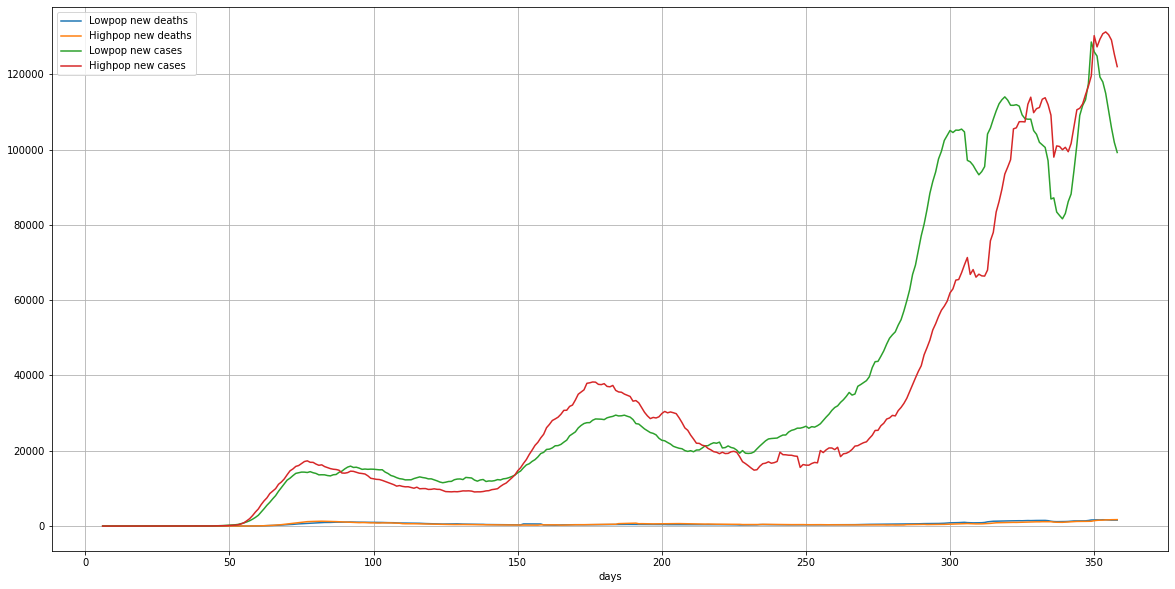

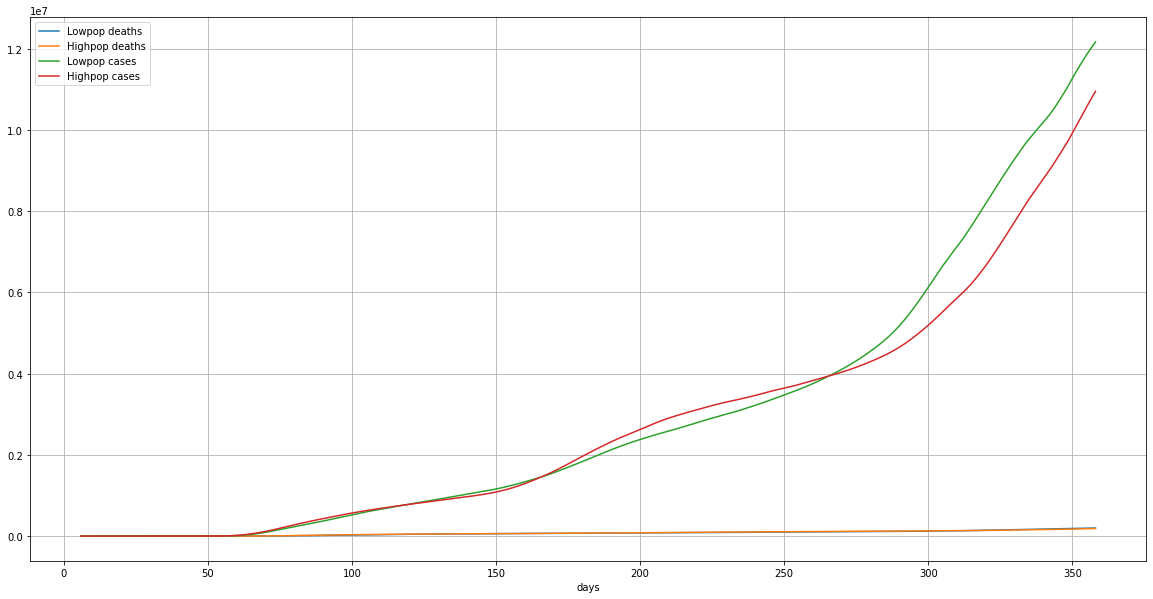

In [127]:
"""Daily Cases , with Daily deaths for reference"""

df_try.plot(y=['Lowpop new deaths','Highpop new deaths','Lowpop new cases', 'Highpop new cases'],grid=True,figsize=(20,10))

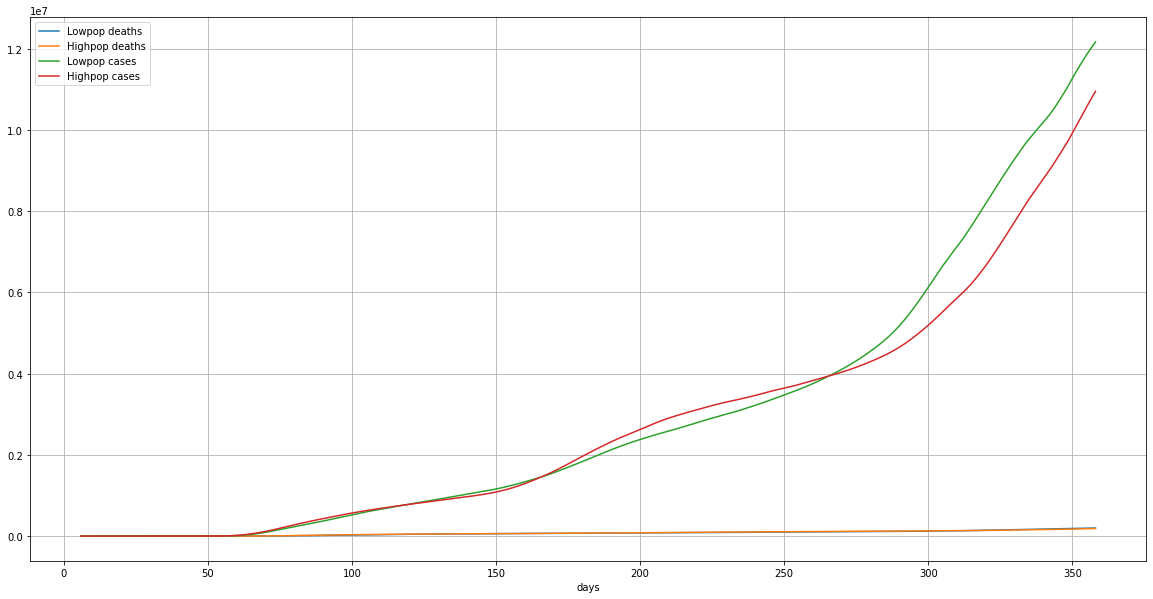

In [126]:
"""Total cumulative cases, with cumulative deaths for reference"""
df_try.plot(y=['Lowpop deaths', 'Highpop deaths', 'Lowpop cases', 'Highpop cases'],grid=True,figsize=(20,10))

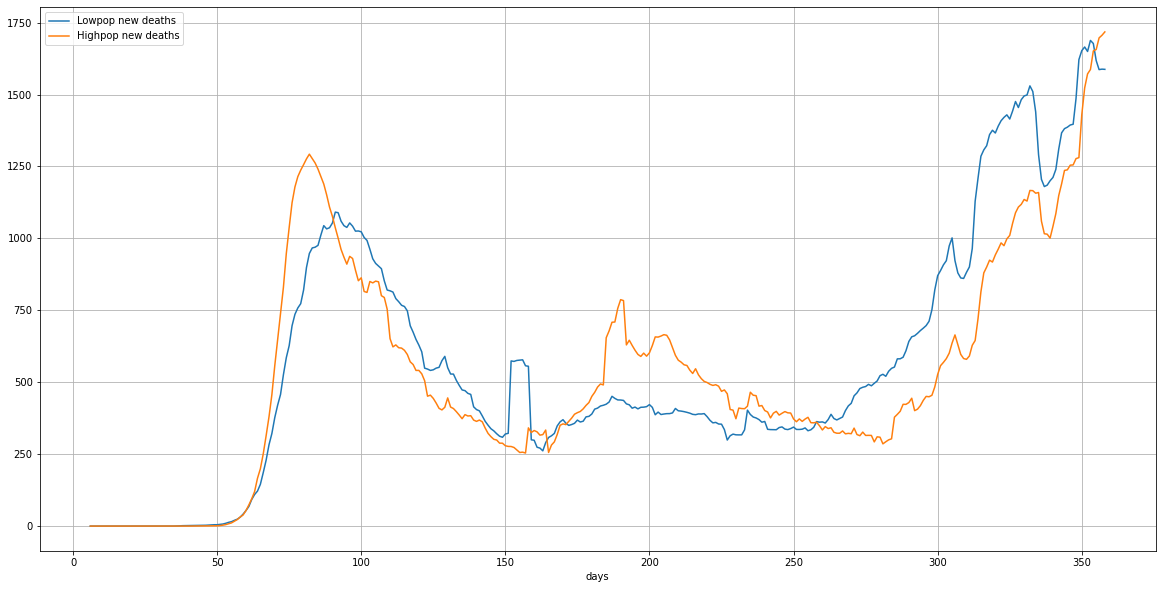

In [128]:
"""Daily Deaths"""
df_try.plot(y=['Lowpop new deaths', 'Highpop new deaths'],grid=True,figsize=(20,10))

## Conclusion

My hypothesis was that the states that are less populated would be less effected by COVID due to less likelyhood of transmission between persons. I expected there to be less cases, or at the very least lag behind the more populated states.

I tested this by comparing the 8 most dense states in the US, who totals about 50% the total population, vs. the remaining states totalling the other half of the population.

I compared their # of total cases, daily cases, daily deaths, and found little variance between them.

This shows me that my hypothesis was wrong, and that all parts of the United States seem to be getting cases and deaths at nearly the same rate when aggregated together. 

